In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
bus_df = pd.read_csv(r'/Users/daviddangol/Documents/monthly report/Bus Book Data/data/Bussewa data From Oct 15 to nov 1.csv')

In [3]:
bus_df = bus_df.drop_duplicates(subset=['Txn_code'])
display(bus_df.head())
display(bus_df.info())
display(bus_df.describe())

,Date,Account_id,Name,Txn_code,Product Code,Product name,Status,child_txn,child_status,User Type,Departure location,Arrival Location,Bus operator name,Contact_person,Total_seats,Transaction amount,tripDate
0,10/15/2025,635215,santosh poudel,14OHI6H,BUSSEWA-API,Bussewa Direct Pay,COMPLETE,NaN,NaN,User,Kathmandu,Butwal,Bussewa Direct Pay,9851227275,1,1250.0,2025-10-19
1,10/15/2025,7793234,Madan Bishwakarma,14OHK74,NP-ES-BUSSEWA0-DIRECT,Bussewa 0 - DIRECT,COMPLETE,NaN,NaN,User,Damak,Kathmandu,Bussewa 0 - DIRECT,NaN,1,2200.0,2025-10-15
2,10/15/2025,12952657,Krishna Khanal,14OHNVW,NP-ES-BUSSEWA0-DIRECT,Bussewa 0 - DIRECT,COMPLETE,NaN,NaN,User,Pokhara,Butwal,Bussewa 0 - DIRECT,Sher Bdr Thapa: 9856017435,1,1000.0,2025-10-15
3,10/15/2025,882152,Kamal Bhakta Pokhrel,14OHVYR,NP-ES-BUSSEWA0-DIRECT,Bussewa 0 - DIRECT,COMPLETE,NaN,NaN,User,Pokhara,Dhulikhel,Bussewa 0 - DIRECT,Sundar Ghimire: 9856042329,4,5200.0,2025-10-17
4,10/15/2025,9438857,Sagar Awasthi,14OISDH,NP-ES-BUSSEWA0-DIRECT,Bussewa 0 - DIRECT,COMPLETE,NaN,NaN,User,Pokhara,Kathmandu,Bussewa 0 - DIRECT,Narayan parsad Bhandari: 9856003051,2,4600.0,2025-10-16


<class 'pandas.core.frame.DataFrame'>
Index: 16929 entries, 0 to 16946
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                16929 non-null  object 
 1   Account_id          16929 non-null  int64  
 2   Name                16929 non-null  object 
 3   Txn_code            16929 non-null  object 
 4   Product Code        16929 non-null  object 
 5   Product name        16929 non-null  object 
 6   Status              16929 non-null  object 
 7   child_txn           72 non-null     object 
 8   child_status        72 non-null     object 
 9   User Type           16929 non-null  object 
 10  Departure location  16929 non-null  object 
 11  Arrival Location    16929 non-null  object 
 12  Bus operator name   16929 non-null  object 
 13  Contact_person      15354 non-null  object 
 14  Total_seats         16929 non-null  int64  
 15  Transaction amount  16929 non-null  float64
 16  tripDate 

None

,Account_id,Total_seats,Transaction amount
count,1.692900e+04,16929.000000,16929.000000
mean,4.208619e+06,1.596078,2237.665765
std,3.295926e+06,0.929903,1459.703985
min,8.050000e+02,1.000000,350.000000
25%,1.142898e+06,1.000000,1270.000000
50%,3.610493e+06,1.000000,1600.000000
75%,6.447708e+06,2.000000,2700.000000
max,1.306387e+07,9.000000,29745.000000


In [4]:
total_transaction_amount = bus_df['Transaction amount'].sum()
print(f"Total transaction amount: {total_transaction_amount}")


Total transaction amount: 37881443.739999995


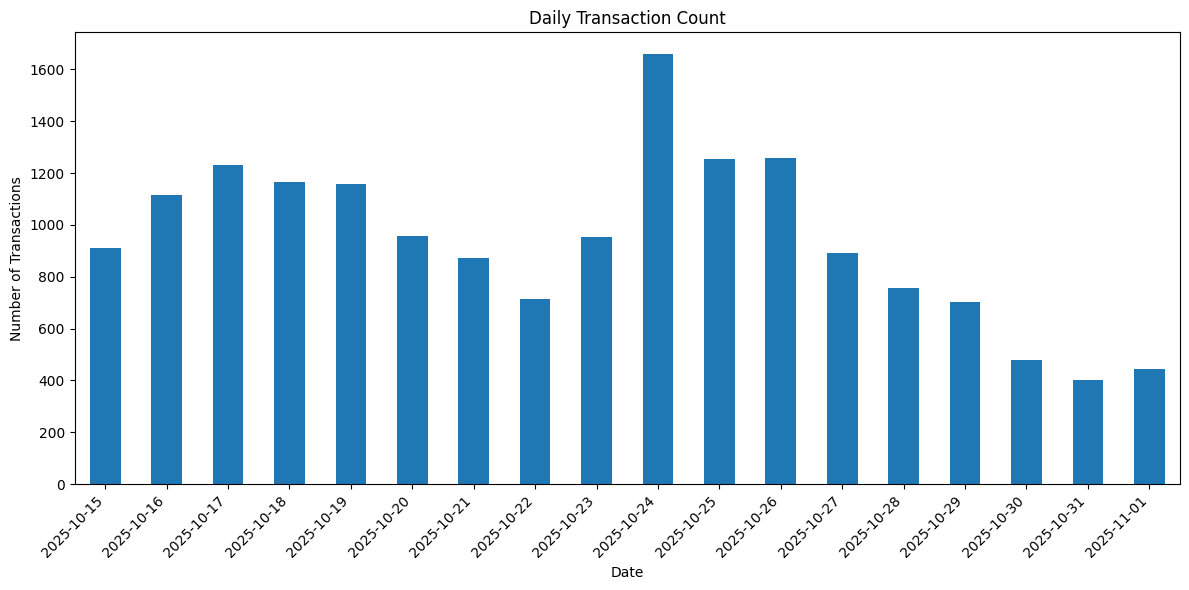

In [5]:
bus_df['Date'] = pd.to_datetime(bus_df['Date'])
daily_transactions = bus_df['Date'].dt.date.value_counts().sort_index()

plt.figure(figsize=(12, 6))
daily_transactions.plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Transaction Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [6]:
arrival_location_counts = bus_df['Arrival Location'].value_counts()
arrival_location_percentages = (arrival_location_counts / len(bus_df)) * 100

print("Arrival Location Counts:")
display(arrival_location_counts)

print("\nArrival Location Percentages:")
display(arrival_location_percentages.round(2))

Arrival Location Counts:


Arrival Location
Kathmandu                          8102
Pokhara                            1890
Butwal                             1413
Bhairahawa                          719
Chitwan                             421
                                   ... 
Jeetpur (Birgunj)                     1
Nijgadh                               1
Tribhuvan International Airport       1
Dule Gauda                            1
Siliguri Tenzing Norge Bus Stop       1
Name: count, Length: 279, dtype: int64


Arrival Location Percentages:


Arrival Location
Kathmandu                          47.86
Pokhara                            11.16
Butwal                              8.35
Bhairahawa                          4.25
Chitwan                             2.49
                                   ...  
Jeetpur (Birgunj)                   0.01
Nijgadh                             0.01
Tribhuvan International Airport     0.01
Dule Gauda                          0.01
Siliguri Tenzing Norge Bus Stop     0.01
Name: count, Length: 279, dtype: float64

In [7]:
dept_location_counts = bus_df['Departure location'].value_counts()
dept_location_percentages = (dept_location_counts / len(bus_df)) * 100

print("Depart Location Counts:")
display(dept_location_counts)

print("\nDepart Location Percentages:")
display(dept_location_percentages.round(2))

Depart Location Counts:


Departure location
Kathmandu                 7411
Pokhara                   2717
Butwal                    1706
Bhairahawa                1019
Chitwan                    394
                          ... 
Mahalaxmisthan               1
Traffic Chowk(Ghorahi)       1
Kagbeni                      1
Jinuwa                       1
Chakrapath                   1
Name: count, Length: 244, dtype: int64


Depart Location Percentages:


Departure location
Kathmandu                 43.78
Pokhara                   16.05
Butwal                    10.08
Bhairahawa                 6.02
Chitwan                    2.33
                          ...  
Mahalaxmisthan             0.01
Traffic Chowk(Ghorahi)     0.01
Kagbeni                    0.01
Jinuwa                     0.01
Chakrapath                 0.01
Name: count, Length: 244, dtype: float64

In [8]:
account_ticket_counts = bus_df['Account_id'].value_counts().reset_index()
account_ticket_counts.columns = ['Account_id', 'Ticket_Count']

# Merge with the original DataFrame to get the Account Name
account_ticket_counts = account_ticket_counts.merge(bus_df[['Account_id', 'Name']], on='Account_id', how='left').drop_duplicates(subset=['Account_id'])

# Display the result
print("Top Accounts by Ticket Count:")
display(account_ticket_counts.nlargest(10, 'Ticket_Count'))

Top Accounts by Ticket Count:


,Account_id,Ticket_Count,Name
0,2187706,14,Ranjit Khanal
14,8369962,5,Sunil Shrestha
19,1219289,5,Krishna Thapa
24,8533470,5,Basanta Paudel
29,5500423,5,Muhammad Anis
34,5605837,5,Manoj Ku Gupta
39,263497,5,ashim Kumar lamsal
44,8233007,4,Pancharam Kawar Yogi
48,10198190,4,Mahendra Giri
52,8181678,4,Mamta Banstola


In [9]:
product_code_counts = bus_df['Product Code'].value_counts()
product_code_percentages = (product_code_counts / len(bus_df)) * 100
product_code_summary = pd.DataFrame({
    'Count': product_code_counts,
    'Percentage': product_code_percentages
})

product_name_counts = bus_df['Product name'].value_counts()
product_name_percentages = (product_name_counts / len(bus_df)) * 100
product_name_summary = pd.DataFrame({
    'Count': product_name_counts,
    'Percentage': product_name_percentages
})

print("Product Code Distribution:")
display(product_code_summary.round(2))

print("\nProduct Name Distribution:")
display(product_name_summary.round(2))

Product Code Distribution:


,Count,Percentage
Product Code,,
NP-ES-BUSSEWA0-DIRECT,15754,93.06
BUSSEWA-API,1175,6.94



Product Name Distribution:


,Count,Percentage
Product name,,
Bussewa 0 - DIRECT,15754,93.06
Bussewa Direct Pay,1175,6.94


In [10]:
total_seats_per_destination = bus_df.groupby('Arrival Location')['Total_seats'].sum()
print("Top 10 Arrival Locations by Total Seats:")
display(total_seats_per_destination.nlargest(10))


Top 10 Arrival Locations by Total Seats:


Arrival Location
Kathmandu     13270
Pokhara        3241
Butwal         2118
Bhairahawa     1149
Chitwan         675
Kushma          286
Baglung         257
Sauraha         233
Dang            228
Janakpur        208
Name: Total_seats, dtype: int64

Distribution of days between booking and trip date:


booking_to_trip_days
-25.0       1
-16.0       1
-8.0        1
-1.0        2
 0.0     4212
 1.0     7142
 2.0     2905
 3.0     1255
 4.0      643
 5.0      331
 6.0      207
 7.0       74
 8.0       67
 9.0       30
 10.0      14
 11.0      11
 12.0      11
 13.0       2
 14.0       1
 15.0       1
 16.0       1
 18.0       1
 22.0       2
 24.0       1
 25.0       1
 26.0       1
Name: count, dtype: int64

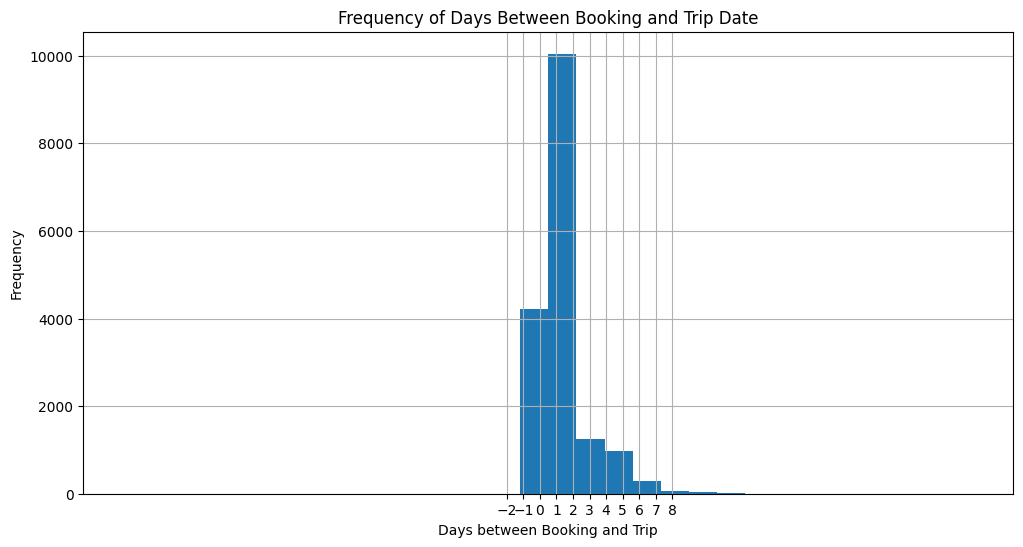

In [12]:
# Convert 'tripDate' to datetime objects, coercing errors
bus_df['tripDate'] = pd.to_datetime(bus_df['tripDate'], errors='coerce')

# Calculate the difference in days between 'Date' and 'tripDate'
bus_df['booking_to_trip_days'] = (bus_df['tripDate'] - bus_df['Date']).dt.days

# Display the distribution of the time difference
print("Distribution of days between booking and trip date:")
display(bus_df['booking_to_trip_days'].value_counts().sort_index())

# Visualize the distribution
plt.figure(figsize=(12, 6))
bus_df['booking_to_trip_days'].hist(bins=30)
plt.xlabel('Days between Booking and Trip')
plt.ylabel('Frequency')
plt.title('Frequency of Days Between Booking and Trip Date')

# Set explicit x-axis ticks for better visibility
desired_ticks = [-2, -1] + list(range(9)) # -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8
plt.xticks(desired_ticks)

plt.show()

In [16]:
esewa_1 = bus_df.copy()

In [17]:
# Convert 'Date' to datetime objects
esewa_bus_book['Date'] = pd.to_datetime(esewa_1['Date'], errors='coerce')

# Extract date only
esewa_bus_book['Date_Only'] = esewa_bus_book['Date'].dt.date

# Group by date and Arrival Location and count the frequency
arrival_date_frequency_bus = esewa_bus_book.groupby(['Date_Only', 'Arrival Location']).size().reset_index(name='Booking_Frequency')

# Create a stacked bar chart for Arrival Locations
fig_arrival_date_bus = px.bar(arrival_date_frequency_bus,
                              x='Date_Only',
                              y='Booking_Frequency',
                              color='Arrival Location',
                              title='Daily Bus Booking Frequency by Arrival Location')

# Add tooltips
fig_arrival_date_bus.update_traces(hovertemplate='Date: %{x}<br>Booking Frequency: %{y}<br>Arrival Location: %{customdata}<extra></extra>',
                                  customdata=arrival_date_frequency_bus['Arrival Location'])

fig_arrival_date_bus.show()

NameError: name 'esewa_bus_book' is not defined